In [1]:

# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import requests
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
# Display all of the columns
pd.set_option('display.max_columns', None)

In [2]:
# Raw URL of the database file on GitHub
url = 'https://github.com/BFletchall/Project-4-Group-4-Machine-Learning/raw/main/claimed_time.db'
# Download the database file
r = requests.get(url)
with open('claimed_time.db', 'wb') as f:
    f.write(r.content)
# Connect to the SQLite database
conn = sqlite3.connect('claimed_time.db')
# Query data from the database table
query = "SELECT * FROM claimed_table"
# Read data into DataFrame
df = pd.read_sql(query, conn)
# Close the database connection
conn.close()
# Display the first few rows of the DataFrame
df.head()

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0


In [3]:
df.columns

Index(['NumberWithDash', 'EPM_ProductionControlItemID', 'EPM_MainMark',
       'EPM_InstanceNumber', 'Assembly_MainPieceProductionCode',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_SurfaceAreaEachSqFt', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_MainPartFinishDescr',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'EPM_AdjustedStationName', 'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalHours_ThisLaborGroup'],
      dtype='object')

In [4]:
# Convert Assembly_EstTotalHours_ThisLaborGroup from hours to seconds
# Fill NaN values in Assembly_EstTotalHours_ThisLaborGroup with 0
df['Assembly_EstTotalHours_ThisLaborGroup'].fillna(0, inplace=True)

# Convert Assembly_EstTotalHours_ThisLaborGroup from hours to seconds
df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalHours_ThisLaborGroup'] * 3600

df

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0,0.0
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,0.0
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0,0.0
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,0.0
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,328,0.0,0.0
11228,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Weld,9782,0.0,0.0
11229,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Fab/Layout,9133,0.0,0.0
11230,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,92,0.0,0.0


In [5]:
#df.dtypes
df['Assembly_EstTotalSeconds_ThisLaborGroup'].unique()

array([    0.     ,  6098.46   , 10474.86   , ...,  2792.673  ,
        2043.96525,   803.72025])

In [6]:
df['Assembly_EstTotalSeconds_ThisLaborGroup'] = df['Assembly_EstTotalSeconds_ThisLaborGroup'].replace(0., np.nan)
df

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
0,19-048,870038,T124,1,S.S. TUBE STEEL,2.81,39.575,4.43,HSS,4 x 2 x 0.25,N - No Paint,1,1,Fab/Layout,142,0.0,NaN
1,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,NaN
2,19-048,870040,T125,1,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,47,0.0,NaN
3,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Fab/Layout,124,0.0,NaN
4,19-048,870040,T125,2,S.S. TUBE STEEL,7.91,112.116,12.50,HSS,4 x 2 x 0.25,N - No Paint,2,1,Weld,48,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,328,0.0,NaN
11228,24-502,901310,SS101,1,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Weld,9782,0.0,NaN
11229,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Fab/Layout,9133,0.0,NaN
11230,24-502,901310,SS101,2,STAIR STRINGER,8.22,370.278,75.41,C,8 x 11.5,"D - Steel, Paint All",2,17,Material Handling,92,0.0,NaN


In [7]:
# Drop columns with null values in the column Assembly_EstTotalHours_ThisLaborGroup

df_drop = df.dropna(subset=['Assembly_EstTotalSeconds_ThisLaborGroup'])
df_drop

,NumberWithDash,EPM_ProductionControlItemID,EPM_MainMark,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_SurfaceAreaEachSqFt,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_MainPartFinishDescr,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalHours_ThisLaborGroup,Assembly_EstTotalSeconds_ThisLaborGroup
816,22-130,637120,B456,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,62,1.694017,6098.460000
817,22-130,637120,B456,1,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2525,2.909683,10474.860000
818,22-130,637120,B456,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,99,1.694017,6098.460000
819,22-130,637120,B456,2,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Peddi Assembler,2620,2.909683,10474.860000
820,22-130,637120,B456,3,BEAM,40.97,2293.910,257.74,W,21 x 55,"DS - Special Case/Steel, Paint All",3,18,Material Handling,14,1.694017,6098.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,24-011,837518,B107,38,CHANNEL,12.00,261.570,40.31,C,6 x 10.5,N - No Paint,45,11,Weld,1649,0.099224,357.207843
9896,24-011,837518,B107,39,CHANNEL,12.00,261.570,40.31,C,6 x 10.5,N - No Paint,45,11,Weld,4,0.049612,178.603922
9907,24-011,868657,B109,1,CHANNEL,11.08,125.442,26.59,C,4 x 5.4,N - No Paint,8,10,Fab/Layout,2310,0.775743,2792.673000
9908,24-011,868657,B109,1,CHANNEL,11.08,125.442,26.59,C,4 x 5.4,N - No Paint,8,10,Material Handling,241,0.567768,2043.965250


In [8]:
df_reduce =df_drop.drop(columns=['EPM_MainMark', 'Assembly_EstTotalHours_ThisLaborGroup', 'NumberWithDash','Assembly_SurfaceAreaEachSqFt','Assembly_MainPartFinishDescr'], inplace=False)
df_reduce.head(30)

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPieceProductionCode,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_MainPartShape,Assembly_MainPartDimension,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,EPM_AdjustedStationName,TimeInSeconds_ThisWorkSegment,Assembly_EstTotalSeconds_ThisLaborGroup
816,637120,1,BEAM,40.97,2293.910,W,21 x 55,3,18,Material Handling,62,6098.460
817,637120,1,BEAM,40.97,2293.910,W,21 x 55,3,18,Peddi Assembler,2525,10474.860
818,637120,2,BEAM,40.97,2293.910,W,21 x 55,3,18,Material Handling,99,6098.460
819,637120,2,BEAM,40.97,2293.910,W,21 x 55,3,18,Peddi Assembler,2620,10474.860
820,637120,3,BEAM,40.97,2293.910,W,21 x 55,3,18,Material Handling,14,6098.460
821,637120,3,BEAM,40.97,2293.910,W,21 x 55,3,18,Peddi Assembler,2614,10474.860
822,637131,1,BEAM,23.08,633.943,W,12 x 26,1,8,Material Handling,95,24469.200
823,637131,1,BEAM,23.08,633.943,W,12 x 26,1,8,Peddi Assembler,2322,7328.304
824,637137,1,BEAM,40.97,2293.910,W,21 x 55,1,18,Material Handling,20,6098.652
825,637137,1,BEAM,40.97,2293.910,W,21 x 55,1,18,Peddi Assembler,2589,10475.028


In [9]:
df_reduce.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPieceProductionCode', 'Assembly_MainPartLengthFt',
       'Assembly_WeightEachLbs', 'Assembly_MainPartShape',
       'Assembly_MainPartDimension', 'Assembly_TotalQuantityInJob',
       'Assembly_NumSmallParts', 'EPM_AdjustedStationName',
       'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalSeconds_ThisLaborGroup'],
      dtype='object')

In [10]:
# Determine the number of unique values in each column.
unique_values = df_reduce.nunique()
print(unique_values)

EPM_ProductionControlItemID                1176
EPM_InstanceNumber                          141
Assembly_MainPieceProductionCode             24
Assembly_MainPartLengthFt                   651
Assembly_WeightEachLbs                     1035
Assembly_MainPartShape                       13
Assembly_MainPartDimension                  208
Assembly_TotalQuantityInJob                  31
Assembly_NumSmallParts                       75
EPM_AdjustedStationName                       7
TimeInSeconds_ThisWorkSegment              2067
Assembly_EstTotalSeconds_ThisLaborGroup    2764
dtype: int64


In [11]:
# Look at APPLICATION_TYPE value counts for binning
job_type_counts = df_reduce['Assembly_MainPieceProductionCode'].value_counts()
print(job_type_counts)

Assembly_MainPieceProductionCode
BEAM                 1240
BENT PLATE            479
COLUMN                468
TUBE STEEL            427
ANGLE                 397
RAIL                  247
PLATE                 179
CHANNEL               174
BOLLARD                70
STRINGER               58
ROLLED TUBE STEEL      35
ALUM EMBED ANGLE       33
FRAME_COLUMN           28
ALUM PLATE             15
TREAD                  15
EMBED                  14
ALUM PIPE              12
CRANE GIRDER           12
TRUSS                   8
PIPE                    3
V-BRACE                 2
FRAME                   2
PLATE WASHER            2
ALUM STRINGER           1
Name: count, dtype: int64


In [12]:
# Choose a cutoff value and create a list of job types to be replaced
# use the variable name `job_types_to_replace`
cutoff_value = 20

job_types_to_replace = [app for app, count in job_type_counts.items() if count < cutoff_value]

# Replace in dataframe
for app in job_types_to_replace:
    df_reduce['Assembly_MainPieceProductionCode'] =  df_reduce['Assembly_MainPieceProductionCode'].replace(app,"Other")

# Check to make sure binning was successful
df_reduce['Assembly_MainPieceProductionCode'].value_counts()

Assembly_MainPieceProductionCode
BEAM                 1240
BENT PLATE            479
COLUMN                468
TUBE STEEL            427
ANGLE                 397
RAIL                  247
PLATE                 179
CHANNEL               174
Other                  86
BOLLARD                70
STRINGER               58
ROLLED TUBE STEEL      35
ALUM EMBED ANGLE       33
FRAME_COLUMN           28
Name: count, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
df_reduce_encoded = pd.get_dummies(df_reduce)
df_reduce_encoded.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalSeconds_ThisLaborGroup',
       'Assembly_MainPieceProductionCode_ALUM EMBED ANGLE',
       'Assembly_MainPieceProductionCode_ANGLE',
       ...
       'Assembly_MainPartDimension_9 x 5 x 0.375',
       'Assembly_MainPartDimension_9 x 9 x 0.313',
       'Assembly_MainPartDimension_9 x 9 x 0.625',
       'EPM_AdjustedStationName_Beam Cambering', 'EPM_AdjustedStationName_Cut',
       'EPM_AdjustedStationName_Fab/Layout',
       'EPM_AdjustedStationName_Material Handling',
       'EPM_AdjustedStationName_Paint',
       'EPM_AdjustedStationName_Peddi Assembler',
       'EPM_AdjustedStationName_Weld'],
      dtype='object', length=250)

In [14]:
X = df_reduce_encoded.copy()
X.drop("TimeInSeconds_ThisWorkSegment", axis=1, inplace=True)
X.head()

,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,Assembly_EstTotalSeconds_ThisLaborGroup,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_Other,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AL,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_FB,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_W,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1/2 x 2,Assembly_MainPartDimension_1/2 x 3,Assembly_MainPartDimension_1/2 x 5,Assembly_MainPartDimension_1/2 x 7,Assembly_MainPartDimension_1/4 x 1,Assembly_MainPartDimension_1/4 x 104 §,Assembly_MainPartDimension_1/4 x 11 3/8 §,Assembly_MainPartDimension_1/4 x 13 1/2,Assembly_MainPartDimension_1/4 x 13 1/2 §,Assembly_MainPartDimension_1/4 x 13 13/16 §,Assembly_MainPartDimension_1/4 x 14,Assembly_MainPartDimension_1/4 x 14 §,Assembly_MainPartDimension_1/4 x 15 1/8 §,Assembly_MainPartDimension_1/4 x 16 1/4 §,Assembly_MainPartDimension_1/4 x 16 7/16 §,Assembly_MainPartDimension_1/4 x 17 3/8 §,Assembly_MainPartDimension_1/4 x 18 1/2,Assembly_MainPartDimension_1/4 x 18 1/2 §,Assembly_MainPartDimension_1/4 x 2,Assembly_MainPartDimension_1/4 x 20 7/16 §,Assembly_MainPartDimension_1/4 x 25,Assembly_MainPartDimension_1/4 x 27 §,Assembly_MainPartDimension_1/4 x 6,Assembly_MainPartDimension_1/4 x 6 §,Assembly_MainPartDimension_1/4 x 6 3/4,Assembly_MainPartDimension_1/4 x 9 1/2,Assembly_MainPartDimension_10 3/4 x 0.25,Assembly_MainPartDimension_10 x 10 x 0.375,Assembly_MainPartDimension_10 x 10 x 0.5,Assembly_MainPartDimension_10 x 10 x 0.75,Assembly_MainPartDimension_10 x 100,Assembly_MainPartDimension_10 x 12,Assembly_MainPartDimension_10 x 15.3,Assembly_MainPartDimension_10 x 33,Assembly_MainPartDimension_10 x 39,Assembly_MainPartDimension_10 x 4 x 0.375,Assembly_MainPartDimension_10 x 45,Assembly_MainPartDimension_10 x 49,Assembly_MainPartDimension_10 x 5 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.5,Assembly_MainPartDimension_10 x 77,Assembly_MainPartDimension_11ga x 42 3/8,Assembly_MainPartDimension_11ga x 52 3/16,Assembly_MainPartDimension_11ga x 55 7/16,Assembly_MainPartDimension_11ga x 56 1/4,Assembly_MainPartDimension_11ga x 56 5/16,Assembly_MainPartDimension_11ga x 56 7/8,Assembly_MainPartDimension_12 3/4 x 0.25,Assembly_MainPartDimension_12 x 14.3,Assembly_MainPartDimension_12 x 170,Assembly_MainPartDimension_12 x 20.7,Assembly_MainPartDimension_12 x 22,Assembly_MainPartDimension_12 x 26,Assembly_MainPartDimension_12 x 35,Assembly_MainPartDimension_12 x 4 x 0.25,Assembly_MainPartDimension_12 x 40,Assembly_MainPartDimension_12 x 53,Assembly_MainPartDimension_12 x 58,Assembly_MainPartDimension_12 x 65,Assembly_MainPartDimension_12 x 72,Assembly_MainPartDimension_12 x 79,Assembly_MainPartDimension_12 x 8 x 0.375,Assembly_MainPartDimension_12 x 8 x 0.625,Assembly_MainPartDimension_12 x 8.639,Assembly_MainPartDimension_12 x 96,Assembly_MainPartDimension_13 x 31.8,Assembly_MainPartDimension_14 x 120,Assembly_MainPartDimension_14 x 159,Assembly_MainPartDimension_14 x 211,Assembly_MainPartDimension_14 x 22,Assembly_M

In [15]:
y = df_reduce_encoded['TimeInSeconds_ThisWorkSegment'].ravel()
y[:5]

array([  62, 2525,   99, 2620,   14], dtype=int64)

In [16]:
# Preview the data
print("Features Shape:",X.shape)
print("Targe Shape:", y.shape)

Features Shape: (3921, 249)
Targe Shape: (3921,)


In [17]:
df_reduce_encoded.columns

Index(['EPM_ProductionControlItemID', 'EPM_InstanceNumber',
       'Assembly_MainPartLengthFt', 'Assembly_WeightEachLbs',
       'Assembly_TotalQuantityInJob', 'Assembly_NumSmallParts',
       'TimeInSeconds_ThisWorkSegment',
       'Assembly_EstTotalSeconds_ThisLaborGroup',
       'Assembly_MainPieceProductionCode_ALUM EMBED ANGLE',
       'Assembly_MainPieceProductionCode_ANGLE',
       ...
       'Assembly_MainPartDimension_9 x 5 x 0.375',
       'Assembly_MainPartDimension_9 x 9 x 0.313',
       'Assembly_MainPartDimension_9 x 9 x 0.625',
       'EPM_AdjustedStationName_Beam Cambering', 'EPM_AdjustedStationName_Cut',
       'EPM_AdjustedStationName_Fab/Layout',
       'EPM_AdjustedStationName_Material Handling',
       'EPM_AdjustedStationName_Paint',
       'EPM_AdjustedStationName_Peddi Assembler',
       'EPM_AdjustedStationName_Weld'],
      dtype='object', length=250)

In [18]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [19]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [20]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

In [21]:
X_scaler

StandardScaler()

In [22]:
# Scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_test_scaled

array([[-0.69085731, -0.24138787,  1.1276314 , ..., -0.01844592,
        -0.18764666, -0.59830399],
       [-0.04403668, -0.24138787,  0.01469907, ..., -0.01844592,
        -0.18764666, -0.59830399],
       [ 0.09704632, -0.24138787,  0.07855585, ..., -0.01844592,
        -0.18764666,  1.67139115],
       ...,
       [ 0.55210526, -0.24138787,  0.67482883, ..., -0.01844592,
        -0.18764666, -0.59830399],
       [ 1.09451269, -0.24138787,  0.75278385, ..., -0.01844592,
        -0.18764666,  1.67139115],
       [-0.18567193, -0.24138787, -0.3054141 , ..., -0.01844592,
        -0.18764666, -0.59830399]])

# Fitting the Random Forest Model

In [24]:
# Instantiate the Random Forest Regression model
rf_reg = RandomForestRegressor()

In [25]:
# Fit the model to the training data
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [26]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

In [27]:
# Evaluate the model
print("Random Forest Regression Model Score (R^2):", rf_reg.score(X_test_scaled, y_test))
print("Random Forest Regression Mean Absolute Error:", np.mean(np.abs(y_pred_rf - y_test)))

Random Forest Regression Model Score (R^2): 0.6865980745334834
Random Forest Regression Mean Absolute Error: 1874.7802548419982


In [28]:
# Display feature importances
feature_importances = rf_reg.feature_importances_
print("Feature Importances:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_importances[i]}")

Feature Importances:
EPM_ProductionControlItemID: 0.023818555529192396
EPM_InstanceNumber: 0.004034298944506306
Assembly_MainPartLengthFt: 0.008903643329653259
Assembly_WeightEachLbs: 0.016153609550833132
Assembly_TotalQuantityInJob: 0.003420707478566549
Assembly_NumSmallParts: 0.011724749634154577
Assembly_EstTotalSeconds_ThisLaborGroup: 0.8786902769080271
Assembly_MainPieceProductionCode_ALUM EMBED ANGLE: 1.7003621571549612e-06
Assembly_MainPieceProductionCode_ANGLE: 1.0765621123411562e-05
Assembly_MainPieceProductionCode_BEAM: 0.002689335518032829
Assembly_MainPieceProductionCode_BENT PLATE: 6.785594336821144e-06
Assembly_MainPieceProductionCode_BOLLARD: 8.286819215845974e-08
Assembly_MainPieceProductionCode_CHANNEL: 2.999477009060601e-05
Assembly_MainPieceProductionCode_COLUMN: 0.0024682130880211883
Assembly_MainPieceProductionCode_FRAME_COLUMN: 0.001036299367692801
Assembly_MainPieceProductionCode_Other: 0.0029171730998253202
Assembly_MainPieceProductionCode_PLATE: 2.4427612452883

In [29]:
# Create a DataFrame with feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top twelve features with highest importance at the top
top_twelve_features_sorted = feature_importance_df_sorted.head(12)
top_twelve_features_sorted.hvplot.barh(x='Feature', y='Importance',
                                       title='Top Twelve Features by Importance - Random Forest Model (with Software Estimate)',
                                       rot=0, color='blue', legend=False, width=900, height=400)


:Bars   [Feature]   (Importance)

# Predict and Plot

In [30]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)
# Create a DataFrame to store actual and predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf}, index=X_test.index)
# Add columns from X_test to add feature detail
predictions = pd.concat([predictions, X_test], axis=1)
# Add another column
predictions['Difference'] = predictions['Actual'] - predictions['Predicted']

predictions.to_csv('predictions.csv', index=False)
predictions.head(15)

,Actual,Predicted,EPM_ProductionControlItemID,EPM_InstanceNumber,Assembly_MainPartLengthFt,Assembly_WeightEachLbs,Assembly_TotalQuantityInJob,Assembly_NumSmallParts,Assembly_EstTotalSeconds_ThisLaborGroup,Assembly_MainPieceProductionCode_ALUM EMBED ANGLE,Assembly_MainPieceProductionCode_ANGLE,Assembly_MainPieceProductionCode_BEAM,Assembly_MainPieceProductionCode_BENT PLATE,Assembly_MainPieceProductionCode_BOLLARD,Assembly_MainPieceProductionCode_CHANNEL,Assembly_MainPieceProductionCode_COLUMN,Assembly_MainPieceProductionCode_FRAME_COLUMN,Assembly_MainPieceProductionCode_Other,Assembly_MainPieceProductionCode_PLATE,Assembly_MainPieceProductionCode_RAIL,Assembly_MainPieceProductionCode_ROLLED TUBE STEEL,Assembly_MainPieceProductionCode_STRINGER,Assembly_MainPieceProductionCode_TUBE STEEL,Assembly_MainPartShape_AC,Assembly_MainPartShape_AFB,Assembly_MainPartShape_AL,Assembly_MainPartShape_API,Assembly_MainPartShape_C,Assembly_MainPartShape_FB,Assembly_MainPartShape_HSS,Assembly_MainPartShape_HSSR,Assembly_MainPartShape_L,Assembly_MainPartShape_MC,Assembly_MainPartShape_PI,Assembly_MainPartShape_PL,Assembly_MainPartShape_W,Assembly_MainPartDimension_1 1/2SCH40,Assembly_MainPartDimension_1 1/2SCH80,Assembly_MainPartDimension_1 1/4SCH40,Assembly_MainPartDimension_1 1/4SCH80,Assembly_MainPartDimension_1/2 x 2,Assembly_MainPartDimension_1/2 x 3,Assembly_MainPartDimension_1/2 x 5,Assembly_MainPartDimension_1/2 x 7,Assembly_MainPartDimension_1/4 x 1,Assembly_MainPartDimension_1/4 x 104 §,Assembly_MainPartDimension_1/4 x 11 3/8 §,Assembly_MainPartDimension_1/4 x 13 1/2,Assembly_MainPartDimension_1/4 x 13 1/2 §,Assembly_MainPartDimension_1/4 x 13 13/16 §,Assembly_MainPartDimension_1/4 x 14,Assembly_MainPartDimension_1/4 x 14 §,Assembly_MainPartDimension_1/4 x 15 1/8 §,Assembly_MainPartDimension_1/4 x 16 1/4 §,Assembly_MainPartDimension_1/4 x 16 7/16 §,Assembly_MainPartDimension_1/4 x 17 3/8 §,Assembly_MainPartDimension_1/4 x 18 1/2,Assembly_MainPartDimension_1/4 x 18 1/2 §,Assembly_MainPartDimension_1/4 x 2,Assembly_MainPartDimension_1/4 x 20 7/16 §,Assembly_MainPartDimension_1/4 x 25,Assembly_MainPartDimension_1/4 x 27 §,Assembly_MainPartDimension_1/4 x 6,Assembly_MainPartDimension_1/4 x 6 §,Assembly_MainPartDimension_1/4 x 6 3/4,Assembly_MainPartDimension_1/4 x 9 1/2,Assembly_MainPartDimension_10 3/4 x 0.25,Assembly_MainPartDimension_10 x 10 x 0.375,Assembly_MainPartDimension_10 x 10 x 0.5,Assembly_MainPartDimension_10 x 10 x 0.75,Assembly_MainPartDimension_10 x 100,Assembly_MainPartDimension_10 x 12,Assembly_MainPartDimension_10 x 15.3,Assembly_MainPartDimension_10 x 33,Assembly_MainPartDimension_10 x 39,Assembly_MainPartDimension_10 x 4 x 0.375,Assembly_MainPartDimension_10 x 45,Assembly_MainPartDimension_10 x 49,Assembly_MainPartDimension_10 x 5 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.375,Assembly_MainPartDimension_10 x 6 x 0.5,Assembly_MainPartDimension_10 x 77,Assembly_MainPartDimension_11ga x 42 3/8,Assembly_MainPartDimension_11ga x 52 3/16,Assembly_MainPartDimension_11ga x 55 7/16,Assembly_MainPartDimension_11ga x 56 1/4,Assembly_MainPartDimension_11ga x 56 5/16,Assembly_MainPartDimension_11ga x 56 7/8,Assembly_MainPartDimension_12 3/4 x 0.25,Assembly_MainPartDimension_12 x 14.3,Assembly_MainPartDimension_12 x 170,Assembly_MainPartDimension_12 x 20.7,Assembly_MainPartDimension_12 x 22,Assembly_MainPartDimension_12 x 26,Assembly_MainPartDimension_12 x 35,Assembly_MainPartDimension_12 x 4 x 0.25,Assembly_MainPartDimension_12 x 40,Assembly_MainPartDimension_12 x 53,Assembly_MainPartDimension_12 x 58,Assembly_MainPartDimension_12 x 65,Assembly_MainPartDimension_12 x 72,Assembly_MainPartDimension_12 x 79,Assembly_MainPartDimension_12 x 8 x 0.375,Assembly_MainPartDimension_12 x 8 x 0.625,Assembly_MainPartDimension_12 x 8.639,Assembly_MainPartDimension_12 x 96,Assembly_MainPartDimension_13 x 31.8,Assembly_MainPartDimension_14 x 120,Assembly_MainPartDimension_14 x 159,Assembly_MainPartDimension_14 x 211,Assembly_MainPartDimension_1

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_rf)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression Model Score (R^2):", r2)
print("Random Forest Regression Mean Absolute Error:", mae)

Random Forest Regression Model Score (R^2): 0.6865980745334834
Random Forest Regression Mean Absolute Error: 1874.7802548419982


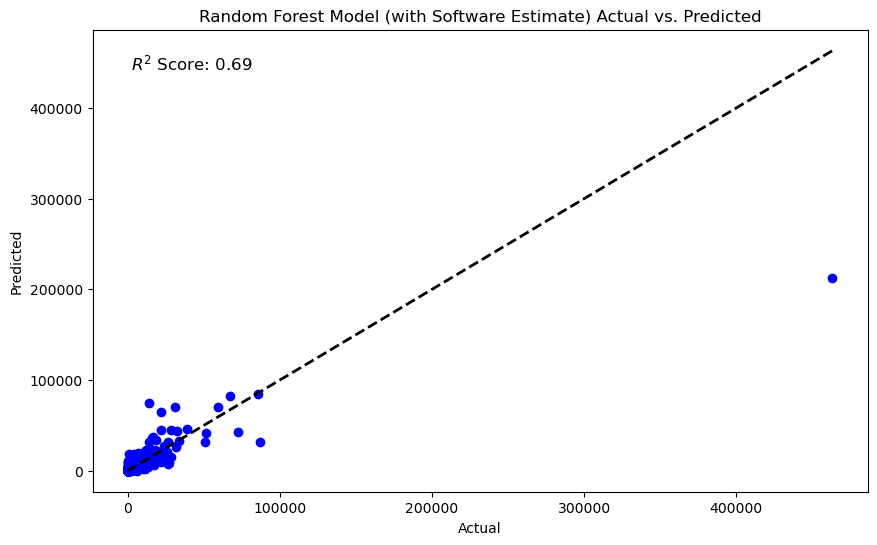

In [36]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.text(0.05, 0.95, '$R^2$ Score: {:.2f}'.format(r2), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Model (with Software Estimate) Actual vs. Predicted')
plt.grid(False)  # Removing grid lines
plt.savefig('RDM_withSoftware_actual_vs_predicted.png', dpi=300, bbox_inches='tight')  # Saving plot to PNG file
plt.show()

# Add Software Estimate in to compare to Predicted Results

In [33]:
# Predict the target values for the test set
y_pred_rf = rf_reg.predict(X_test_scaled)

# Create a DataFrame to store actual and predicted values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf, 'Assembly_EstTotalSeconds_ThisLaborGroup': X_test['Assembly_EstTotalSeconds_ThisLaborGroup'],})

# Add another column
predictions['Difference'] = predictions['Actual'] - predictions['Predicted']
predictions['Predicted Difference Percentage']= predictions['Assembly_EstTotalSeconds_ThisLaborGroup']-predictions['Predicted']
predictions.head(15)


,Actual,Predicted,Assembly_EstTotalSeconds_ThisLaborGroup,Difference,Predicted Difference Percentage
3639,133,132.89,7344.936000,0.11,7212.046000
7255,2984,3543.12,47717.208000,-559.12,44174.088000
7817,18059,13833.64,62394.480000,4225.36,48560.840000
5206,6,10.58,3952.584000,-4.58,3942.004000
9444,6417,11993.00,79328.160000,-5576.00,67335.160000
1526,5238,5146.77,1607.328000,91.23,-3539.442000
3616,1354,2053.00,6429.744000,-699.00,4376.744000
7015,0,0.49,81.232381,-0.49,80.742381
3380,11412,6860.95,35237.808000,4551.05,28376.858000
1328,18686,13519.98,170050.320000,5166.02,156530.340000


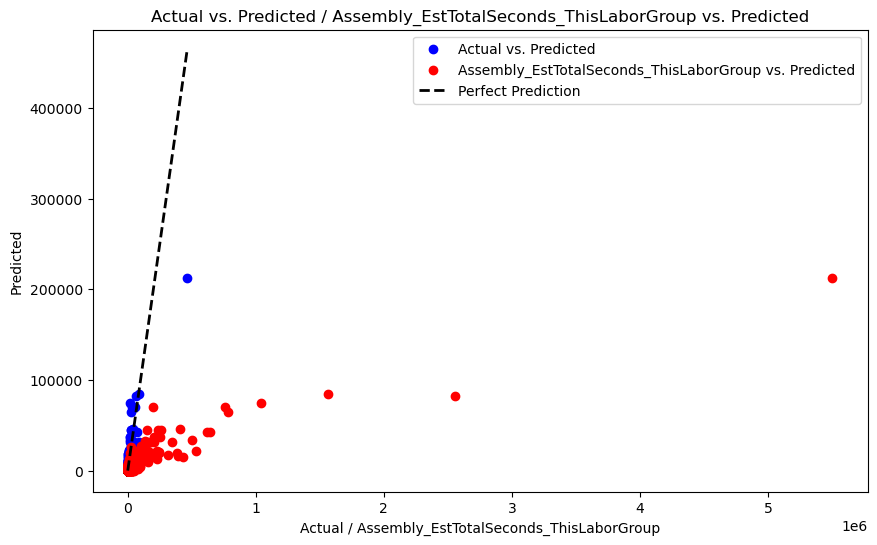

In [35]:
# Plot actual vs. predicted values and Assembly_EstTotalHours_ThisLaborGroup vs. predicted values
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred_rf, color='blue', label='Actual vs. Predicted')

# Plot Assembly_EstTotalSeconds_ThisLaborGroup vs. predicted values
plt.scatter(X_test['Assembly_EstTotalSeconds_ThisLaborGroup'], y_pred_rf, color='red', label='Assembly_EstTotalSeconds_ThisLaborGroup vs. Predicted')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual / Assembly_EstTotalSeconds_ThisLaborGroup')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted / Assembly_EstTotalSeconds_ThisLaborGroup vs. Predicted')
plt.legend()
plt.savefig('Software_actual_vs_predicted.png', dpi=300, bbox_inches='tight')  # Saving plot to PNG file
plt.show()